<a href="https://colab.research.google.com/github/123Cub123Cub1234/META-TimeSeriesAnalysis/blob/master/META_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
meta_data_path = 'meta_2014_2023.csv'
meta_data = pd.read_csv(meta_data_path)
meta_data.dropna(inplace = True)
meta_data['date'] = pd.to_datetime(meta_data['date'])
meta_data.set_index('date', inplace=True)

In [ ]:
X = meta_data.drop(columns = ['next_day_close'])
Y = meta_data.next_day_close

In [ ]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=0.95)
transformed_data = pca.fit_transform(scaled_x)
num_components_95 = pca.n_components_
print(f'Number of components capturing 95% of the variance: {num_components_95}')

Number of components capturing 95% of the variance: 5


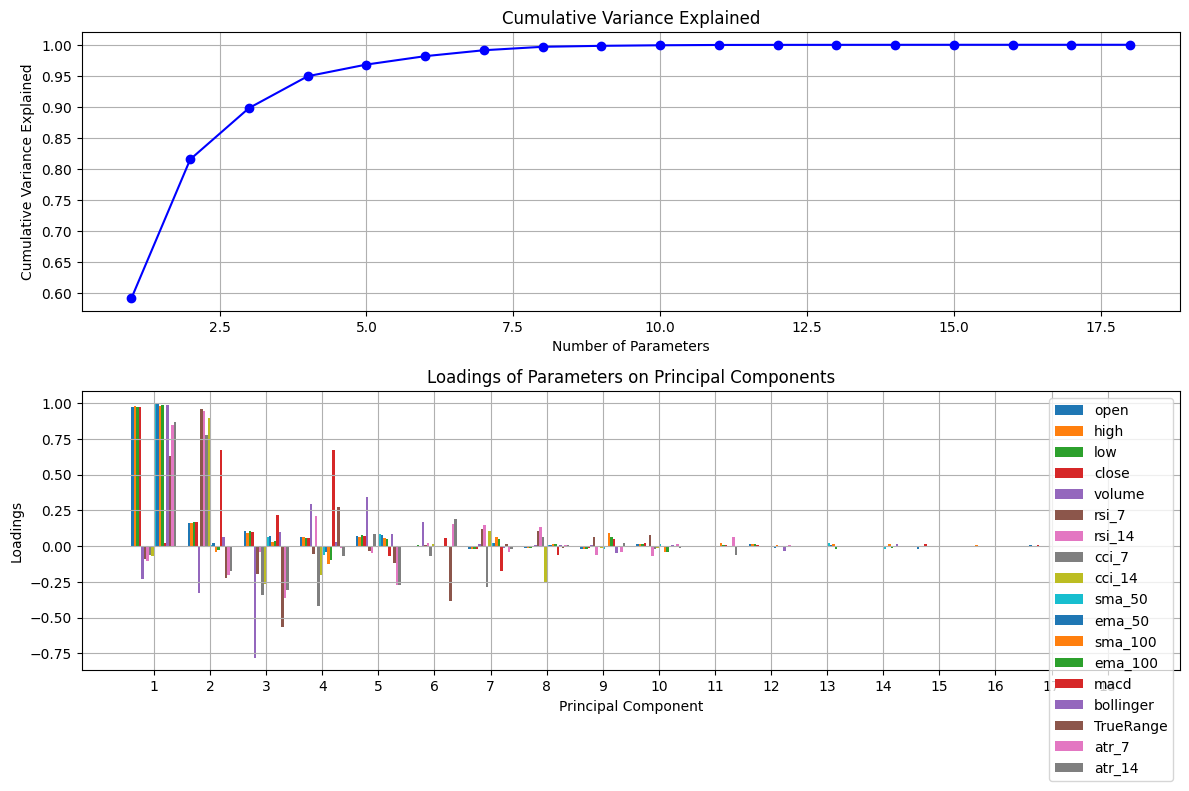

In [ ]:
# Calculate the covariance matrix
cov_matrix = np.cov(scaled_x.T)

# Perform eigen decomposition to get eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Calculate the explained variance ratio
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)

# Multiply the eigenvectors by the square root of the corresponding eigenvalues
loadings = sorted_eigenvectors * np.sqrt(sorted_eigenvalues)

# Plot the bar plot
plt.figure(figsize=(12, 8))
num_components = len(explained_variance_ratio)
num_params = len(X.columns)
bar_width = 0.8 / num_params  # Adjust the bar width based on the number of parameters
component_indices = np.arange(1, num_components + 1)
cumulative_variance = np.cumsum(explained_variance_ratio)  # Calculate cumulative variance explained

# Plot cumulative variance explained
plt.subplot(2, 1, 1)
plt.plot(component_indices, cumulative_variance, marker='o', linestyle='-', color='blue')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Parameters')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)

# Plot loadings
plt.subplot(2, 1, 2)
for i, param_name in enumerate(X.columns):
    plt.bar(component_indices + i * bar_width, loadings[i], width=bar_width, label=param_name)

plt.title('Loadings of Parameters on Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Loadings')
plt.xticks(component_indices + (num_params / 2 - 0.5) * bar_width, component_indices)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(transformed_data, Y)

LinearRegression()

In [ ]:
Y_pred = regressor.predict(transformed_data)

In [ ]:
import matplotlib.pyplot as plt

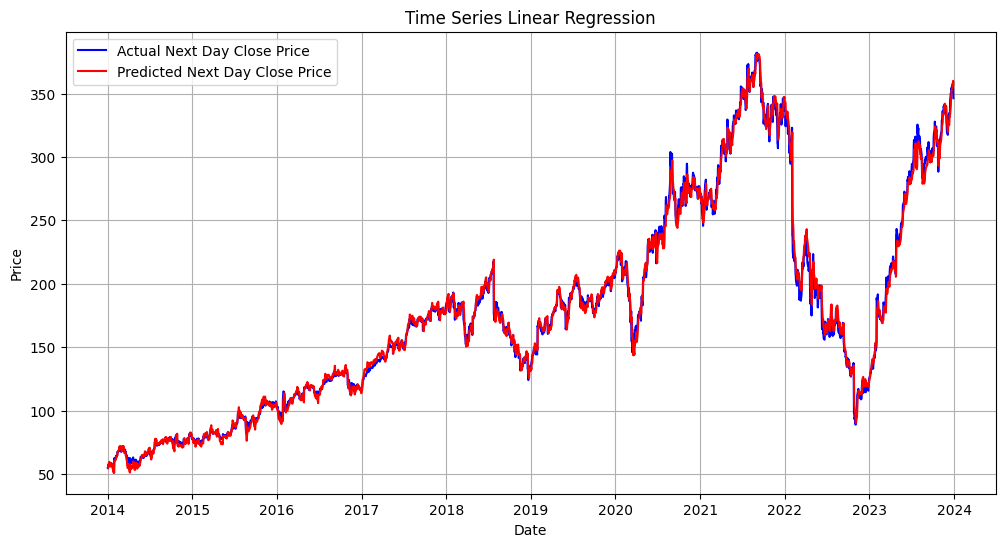

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(meta_data.index, Y, label='Actual Next Day Close Price', color='blue')
plt.plot(meta_data.index, Y_pred, label='Predicted Next Day Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series Linear Regression')
plt.legend()
plt.grid(True)
plt.show()